# 1. Import libraries

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)

In [48]:
data = pd.read_csv('datasets/twitter_training.csv')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [50]:
data = data.rename(columns={'Positive': 'Sentiment'})


In [51]:
data.drop_duplicates(inplace=True)

In [53]:
data.drop(columns=['Borderlands', '2401'], inplace=True)


In [59]:
data = data.rename(columns={data.columns[-1]: 'text'})

In [58]:
data.head()

,Sentiment,text
0,Positive,"I am coming to the borders and I will kill you all,"
1,Positive,"im getting on borderlands and i will kill you all,"
2,Positive,"im coming on borderlands and i will murder you all,"
3,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,Positive,"im getting into borderlands and i can murder you all,"


In [62]:
data.dropna(subset=['text'], inplace=True)

In [75]:

data = data[data['Sentiment'] != 'Irrelevant']
data

,Sentiment,text
0,Positive,"I am coming to the borders and I will kill you all,"
1,Positive,"im getting on borderlands and i will kill you all,"
2,Positive,"im coming on borderlands and i will murder you all,"
3,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,Positive,"im getting into borderlands and i can murder you all,"
...,...,...
74676,Positive,Just realized that the Windows partition of my Mac is like 6 years behind Nvidia drivers and I have no idea how I did not notice
74677,Positive,Just realized that my Mac window partition is 6 years behind on Nvidia drivers and I have no idea how I didn't notice
74678,Positive,Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice
74679,Positive,Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice


In [74]:
sentiment_counts = data['Sentiment'].value_counts()
sentiment_counts


Negative    21698
Positive    19712
Neutral     17708
Name: Sentiment, dtype: int64

In [76]:
data.isnull().sum()

Sentiment    0
text         0
dtype: int64

In [83]:
data['Sentiment'].value_counts(normalize=True)
# .plot(kind='bar')


Negative    0.367029
Positive    0.333435
Neutral     0.299537
Name: Sentiment, dtype: float64

<Axes: >

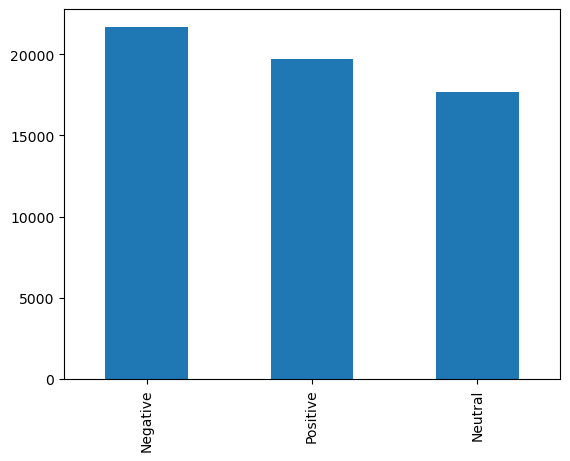

In [84]:
data['Sentiment'].value_counts().plot(kind='bar')

# 2. Data Cleaning

In [105]:
import re

In [112]:
data

,Sentiment,text
0,Positive,"I am coming to the borders and I will kill you all,"
1,Positive,"im getting on borderlands and i will kill you all,"
2,Positive,"im coming on borderlands and i will murder you all,"
3,Positive,"im getting on borderlands 2 and i will murder you me all,"
4,Positive,"im getting into borderlands and i can murder you all,"
...,...,...
74676,Positive,Just realized that the Windows partition of my Mac is like 6 years behind Nvidia drivers and I have no idea how I did not notice
74677,Positive,Just realized that my Mac window partition is 6 years behind on Nvidia drivers and I have no idea how I didn't notice
74678,Positive,Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice
74679,Positive,Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice


In [122]:
import nltk
from nltk.corpus import stopwords

In [125]:
stopwords = set(stopwords.words('english'))
print(stopwords)

{'very', 'nor', "don't", 'i', 'in', 'no', 'so', 'than', 'am', 'she', "shouldn't", "mustn't", 'did', 'before', 're', 'only', 'for', 'isn', 'll', 'when', 'couldn', 'doing', 'mustn', 'after', 'by', 'which', 'out', 'under', 'themselves', 'a', 'doesn', 'its', 'who', 'of', 'through', 'other', "weren't", 'has', "it's", 'is', "isn't", 'theirs', "you'd", 'just', 'didn', 'on', "hasn't", 'hasn', 'aren', 'some', 'can', 'weren', 'this', 's', 'o', 'your', "she's", 'being', 'wasn', 'having', 'ourselves', 'an', "haven't", 'we', 'to', 'the', 'himself', 'them', 'most', 'm', 'further', 'been', 'here', 'shan', "couldn't", 'their', 'myself', 'had', 'same', 'should', 'y', 'then', 'me', 'it', 'was', 'until', 't', 'if', 'hadn', "wasn't", 'about', 'yourself', 'too', 'haven', 'own', "needn't", 'he', 'our', 'now', 'needn', 'ain', 'wouldn', "you'll", 'at', 'down', 'does', 'what', 'while', 'once', 'with', 'above', 'my', "you've", 'are', 'as', "won't", 'will', "aren't", 'these', 'don', "should've", 'between', 'that

In [126]:
len(nltk_stopwords)

179

In [129]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(len(sklearn_stopwords))

318


In [133]:
combined_stopwords = stopwords.union(sklearn_stopwords)

In [134]:
len(combined_stopwords)

378

In [137]:
!pip install contractions

                                              0.0/289.9 kB ? eta -:--:--
     ---                                   30.7/289.9 kB 660.6 kB/s eta 0:00:01
     --------------                         112.6/289.9 kB 1.3 MB/s eta 0:00:01
     ----------------                     133.1/289.9 kB 983.0 kB/s eta 0:00:01
     ---------------------------------      256.0/289.9 kB 1.4 MB/s eta 0:00:01
     ---------------------------------      256.0/289.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------  286.7/289.9 kB 1.2 MB/s eta 0:00:01
     ------------------------------------ 289.9/289.9 kB 995.3 kB/s eta 0:00:00


In [143]:
# Text Normalisation: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
import contractions
lemmatizer = WordNetLemmatizer()

Function to clean

In [144]:
def cleaned_text_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text
    


In [145]:
cleaned_text_data = []
for txt in data['text']:
    cleaned_text_data.append(cleaned_text_without_stopwords(txt))

In [163]:
data['text'][130:135]

154    Ok I am LOVING THIS (also playing Bombs and Earth in anything gets me hype) Very good RPG and the concept is A1!
155                                           Just uninstalled all of my other games to make space for Borderlands 3 . 
156                                                   Just uninstall all my other games to make room for Borderlands 3.
157                                                     Just deleted all my other games to make room for Borderlands 3.
158                                           Just uninstalled all of my other games will make space for Borderlands 3.
Name: text, dtype: object

In [162]:
cleaned_text_data[130:135]

['ok i am loving this also playing bomb and earth in anything get me hype very good rpg and the concept is a ',
 'just uninstalled all of my other game to make space for borderland ',
 'just uninstall all my other game to make room for borderland ',
 'just deleted all my other game to make room for borderland ',
 'just uninstalled all of my other game will make space for borderland ']

In [168]:
def text_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [169]:
cleaned_text_data = list(data['text'].apply(text_cleaner_with_stopwords))
print(cleaned_text_data[:10])

['coming border kill ', 'getting borderland kill ', 'coming borderland murder ', 'getting borderland murder ', 'getting borderland murder ', 'spent hour making fun know huge fan maya favorite character decided make wallpaper original image versus creation enjoy pic twitter com mlsi ', 'spent couple hour fun know huge borderland fan maya favorite character decided make wallpaper original picture compared creation fun pic twitter com mlsi ', 'spent hour fun know huge borderland fan maya favorite character ', 'spent hour making fun know huge rhandlerr fan maya favorite character decided make wallpaper original image versus creation enjoy pic twitter com mlsi ', 'spent hour making fun know huge rhandlerr fan maya favorite character decided make wallpaper original image versus creation enjoy pic twitter com mlsi ']


In [172]:
data['cleaned_text_with_sw'] = cleaned_text_data
data.head()

,Sentiment,text,cleaned_text_with_sw
0,Positive,"I am coming to the borders and I will kill you all,",coming border kill
1,Positive,"im getting on borderlands and i will kill you all,",getting borderland kill
2,Positive,"im coming on borderlands and i will murder you all,",coming borderland murder
3,Positive,"im getting on borderlands 2 and i will murder you me all,",getting borderland murder
4,Positive,"im getting into borderlands and i can murder you all,",getting borderland murder


### Bag of Words Model (Feature Extraction)

Countvectorizer
TF-IDF Vectorizer